# Haberman dataset EDA for data visualisation

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Reading our file and storing it in a dataframe
df=pd.read_csv("haberman.csv")

In [3]:
#First 5 data points of our dataframe
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# No. of data points and columns in our dataframe
df.shape

(306, 4)

In [5]:
#Column names in our dataframe
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

#### Domain Knowledge:
1. Our data has 4 attributes, 3 are features(independant variables) and 1 is class label(dependant variable).<br>
2. Year feature represents the year in which the patient got operated (1958-1969).<br>
3. nodes feature represents the number of lymph nodes in which cancer cells are detected.<br>
4. status feature: if status is 1 then the patient survived 5 or more years after the surgery and if it is 2 then the    patient<br>
    unfortunately did not survived for more than 5 years after the surgery.

In [6]:
#No. of data points per class:
df['status'].value_counts()           

1    225
2     81
Name: status, dtype: int64

### Observation:
Out of total  306 patients, 225 had survived and 81 did not. Our given dataset is Unbalanced


In [7]:
##Statistical description of our dataset
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observation:
1-The average age of patients is 52.5 years.<br>2-The average number of nodes detected in patients is 4.

# Objective:
Given the age,year of surgery and number of nodes we have to build a simple model to predict status=1(higher_survival) or status=2(lower_survival).<br>
Also we have to identify what features are most important for our classification problem.

# Bi-variate analysis

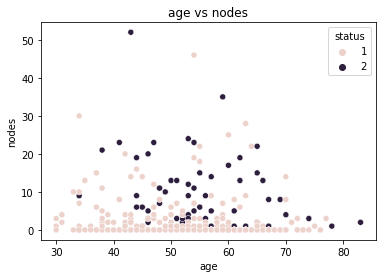

In [8]:
sns.scatterplot(x=df['age'],y=df['nodes'],hue=df['status'])
plt.title("age vs nodes")
plt.show()

### Observation:
In the above plot both the cases i.e status=1 and status=2 are clearly overlapping and are not easily separable.Therefore we cannot conclude anything from this plot.

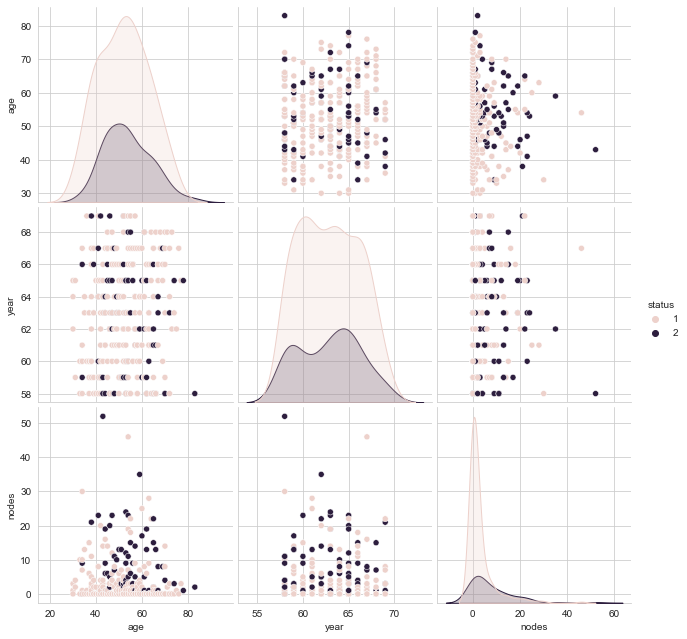

In [9]:
#Bi-variate analysis using pairplots
sns.set_style('whitegrid')
sns.pairplot(df,hue='status',size=3)

### Observation:
Since we cannot see any clear seggregation of points in any of the pairplot. <br>
Therefore, we cannot draw any strong conclusion from this bi-variate analysis.

# Uni-variate analysis:

### PDF and CDF of the 3 features-

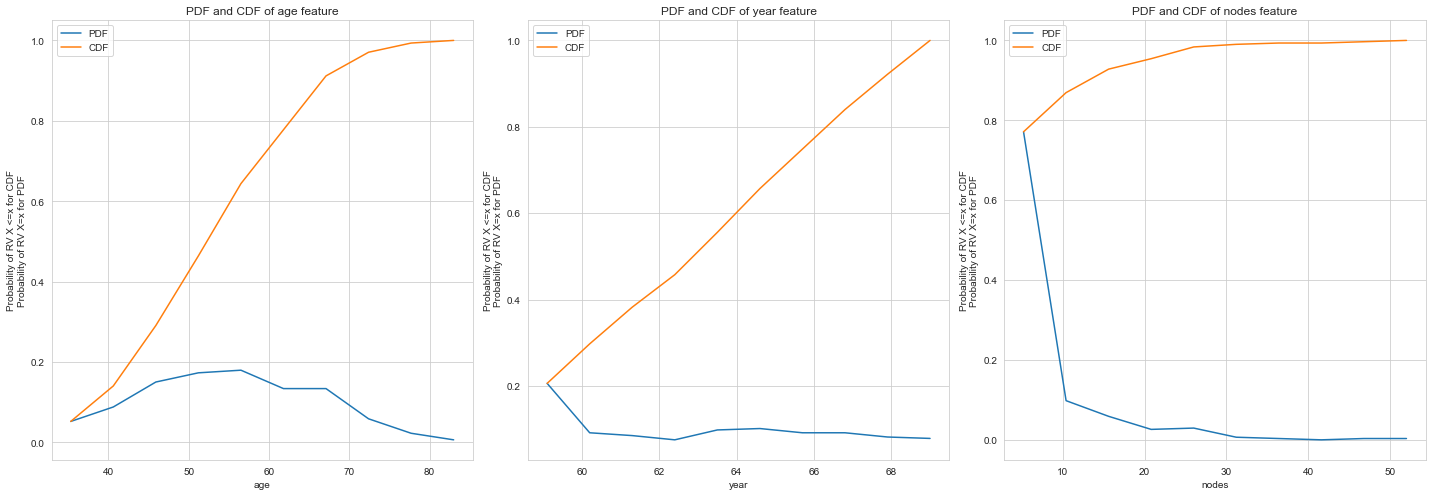

In [10]:
#PDF and CDF of age feature
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
count,bin_edges=np.histogram(df['age'],bins=10,density=True)
PDF=count/sum(count)
CDF=np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.xlabel("age")
plt.ylabel("Probability of RV X <=x for CDF\nProbability of RV X=x for PDF")
plt.legend()
plt.title("PDF and CDF of age feature")



#PDF and CDF of year_of_surgery feature
plt.subplot(1,3,2)
count,bin_edges=np.histogram(df['year'],bins=10,density=True)
PDF=count/sum(count)
CDF=np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.xlabel("year")
plt.ylabel("Probability of RV X <=x for CDF\nProbability of RV X=x for PDF")
plt.legend()
plt.title("PDF and CDF of year feature")


#PDF and CDF of nodes feature
plt.subplot(1,3,3)
count,bin_edges=np.histogram(df['nodes'],bins=10,density=True)
PDF=count/sum(count)
CDF=np.cumsum(PDF)
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.xlabel("nodes")
plt.ylabel("Probability of RV X <=x for CDF\nProbability of RV X=x for PDF")
plt.legend()
plt.title("PDF and CDF of nodes feature")

plt.tight_layout()



## Observation:
1- 60% of the patients has age<55<br>
2- 60% of the total operations has been performed between years 1957-1964<br>
3- 75% of the patients had nodes less than 4<br>

## Now let us analyse the distribution of the 3 features on the basis of survival status-

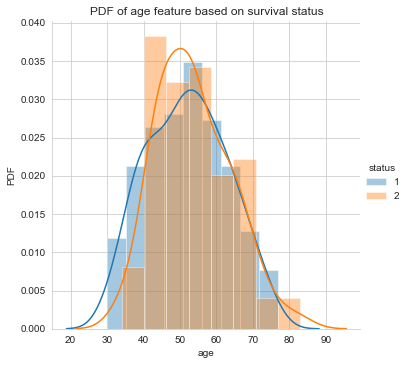

In [11]:
#Uni-variate analysis of age feature on the basis of survival status
sns.FacetGrid(df,hue="status",size=5).map(sns.distplot,'age').add_legend()
plt.ylabel("PDF")
plt.title("PDF of age feature based on survival status")
plt.show()

### Observation:
We observe that for most part the two PDF curves are overlapping hence we can say that the chance of survival or death is irrespective of the age of the person.<br>
However we can roughly say that-<br>
If the age of the patient lies between 30-40 then his chances of survival is more.<br>
If the age lies between 40-58 then his chances of survival is lesser.<br>
If the age lies between 58-76 then his chances of survival and death is roughly the same.<br>
If the age of the person is more than 82 then he has almost no chance of survival.

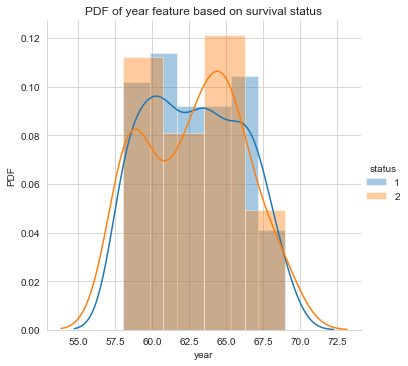

In [12]:
#Univariate analysis of year feature on the basis of survival status
sns.FacetGrid(df,hue="status",size=5).map(sns.distplot,'year').add_legend()
plt.ylabel("PDF")
plt.title("PDF of year feature based on survival status")
plt.show()

### Observation
1-We observe that the year of surgery alone does not play an important role in the status of survival as there is not 
much difference in PDF values for both the status,for most part they overlap.<br>

2-Although we can say that the surgeries done in year 1958 to 1962 had higher chances of being succesful while the surgeries done between 1963 to 1966 had higher chances of being unsuccesful.



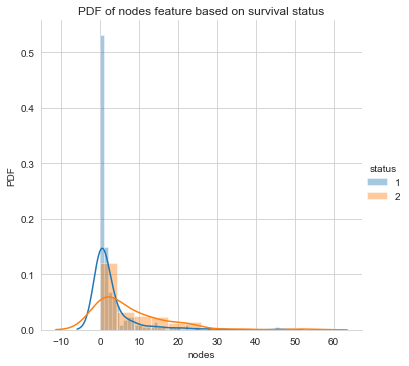

In [13]:
#Univariate analysis of nodes feature on the basis of survival status
sns.FacetGrid(df,hue="status",size=5).map(sns.distplot,'nodes').add_legend()
plt.ylabel("PDF")
plt.title("PDF of nodes feature based on survival status")
plt.show()

### Observation:
1- Patient has higher chance of survival if nodes < 3.<br>

2- We can observe that for number of nodes between 0 to 3(approx) the density in case of people surviving is significantly more.<br>
Hence I can conclude:<br>
    if no. of nodes<3: <br>
        predict status=1 i.e higher chance of survival<br>
    elif no. nodes >3:<br>
        predict status=2 i.e lesser chance of survival

*We conclude from the above plot that nodes feature is the most important feature in our classification problem.*<br>**We will consider nodes feature for our further analysis.**
        
### Problem with our simple model:
Our simple model will predict high chance of survival(i.e status=1) when no. of Nodes is less than 3 and lower chance of survival(i.e status=2) when no. of Nodes is greater than 3.<br>
But as it is evident from above plot that some of the cases which have high rate of survival will be wrongly misclassified as low survival case.<br>
Similarly some of the cases with low rate of survival  will be misclassified as high survival case.To know the percentage we will have to look up to CDF.

### Disadvantage:
Our PDF plots are not able to tell that how many percentage of values are lesser than and greater than 3 for both the survival cases.In order to know that we will have to plot the CDF(Cumulative distribution function).

# CDF:

In [14]:
#Dividing our original dataframe on the basis of status
higher_survival=df[df['status']==1]
lower_survival=df[df['status']==2]

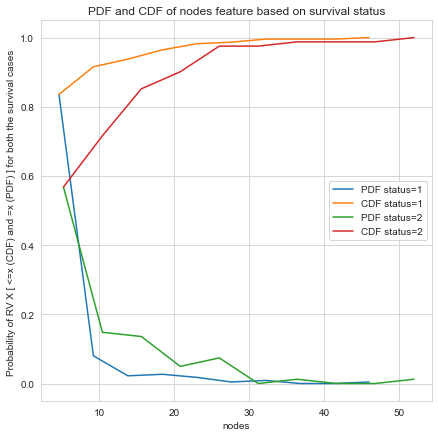

In [15]:
#Plotting PDF and CDF for nodes feature (for both the survival status cases).
plt.figure(figsize=(7,7))
count,bin_edges=np.histogram(higher_survival['nodes'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status=1')
plt.plot(bin_edges[1:],cdf,label='CDF status=1')

count,bin_edges=np.histogram(lower_survival['nodes'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status=2')
plt.plot(bin_edges[1:],cdf,label='CDF status=2')

plt.xlabel('nodes')
plt.ylabel("Probability of RV X [ <=x (CDF) and =x (PDF) ] for both the survival cases ")
plt.title("PDF and CDF of nodes feature based on survival status")
plt.legend()
plt.show()

### Observation:
We observe that-<br>

1- 25% of the patients who survived had nodes greater then 3.<br> 
2- 47% of the patients who did not survive had nodes lesser than 3.<br>

**Therefore our simple model will wrongly classify 25% of status=1 cases(high survival) as status=2 case(lower survival)<br>
and will also wrongly classify 47% of status=2 cases(lower survival) as status=1 case( high survival) for the given data points.
<br>We conclude our model is not performing well and classifying patients into higher survival chance or lower survival chance based on the features given for the given data points(observations) is a difficult task since our dataset is unbalanced.**

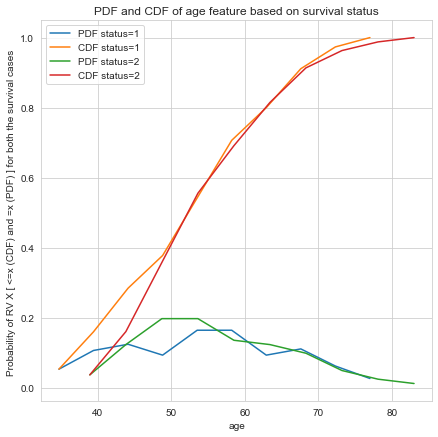

In [16]:
#Plotting PDF and CDF for age feature (for both the survival status cases).
plt.figure(figsize=(7,7))
count,bin_edges=np.histogram(higher_survival['age'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status=1')
plt.plot(bin_edges[1:],cdf,label='CDF status=1')

count,bin_edges=np.histogram(lower_survival['age'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status=2')
plt.plot(bin_edges[1:],cdf,label='CDF status=2')

plt.xlabel('age')
plt.ylabel("Probability of RV X [ <=x (CDF) and =x (PDF) ] for both the survival cases ")
plt.legend()
plt.title("PDF and CDF of age feature based on survival status")
plt.show()

## Observations:
1- 50% of the person who survived had age <52<br>
2- 50% of the person who did not survived had also age <52<br>
*We conclude that age alone does not play an important role while predicting the survival status of a person*

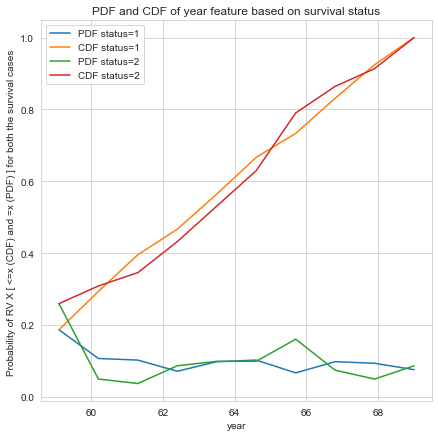

In [17]:
#Plotting PDF and CDF for year feature (for both the survival status cases).
plt.figure(figsize=(7,7))
count,bin_edges=np.histogram(higher_survival['year'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status=1')
plt.plot(bin_edges[1:],cdf,label='CDF status=1')

count,bin_edges=np.histogram(lower_survival['year'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF status=2')
plt.plot(bin_edges[1:],cdf,label='CDF status=2')

plt.xlabel('year')
plt.ylabel("Probability of RV X [ <=x (CDF) and =x (PDF) ] for both the survival cases ")
plt.legend()
plt.title("PDF and CDF of year feature based on survival status")
plt.show()

## Observations:
1- 70% of the patients who survived got operated before 1965<br>
2- 70% of the patients who did not survived also got operated before 1965<br>
*Hence we conclude the year of surgery is not helpful in deciding the status of survival of a person.*

### Boxplot

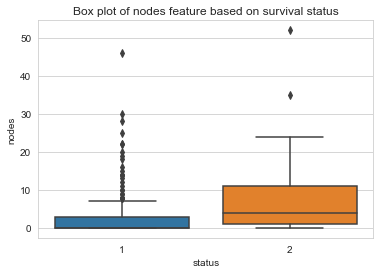

In [18]:
sns.boxplot(x=df['status'],y=df['nodes'])
plt.title("Box plot of nodes feature based on survival status")
plt.show()

### Observation:
We observe that-<br>
1- 75% of the patients who survived had nodes lesser than 3.<br>
2- 50% of the patients who did not survived had node lesser than 4.



### Violin plot

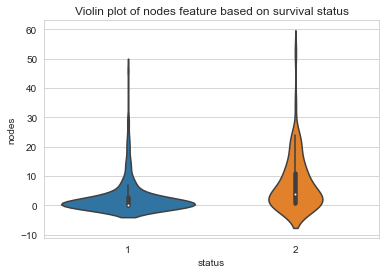

In [19]:
sns.violinplot(x=df['status'],y=df['nodes'])
plt.title("Violin plot of nodes feature based on survival status")
plt.show()

### Observation
For status =1 the nodes feature is almost normally distributed.<br>
for status =2 the nodes feature is rightly skewed

# Mean:

In [20]:
np.mean(higher_survival['nodes'])

2.7911111111111113

In [21]:
np.mean(lower_survival['nodes'])

7.45679012345679

### Observation:
The patients who survived had 2.79 nodes on an average while the patients who did not survived had 7.45 nodes on an average.

# Standard deviation:

In [22]:
np.std(higher_survival['nodes'])

5.857258449412131

In [23]:
np.std(lower_survival['nodes'])

9.128776076761632

### Observation
The spread of nodes feature in case of lower survival case is higher.

# Conclusion:

1-Since the dataset is unbalanced it is a difficult task to classify the survival status of patients based on the features given although we can say if a person has nodes lesser than 3 than his chances of survival is more.<br>2-Age feature is not important for classifying the status.<br>3-Year of surgery is also not important in classifying the status.<br>3-Nodes feature is somewhat important in deciding the status.If the nodes is less than 3 than the person has higher chance of survival than death and vice versa when nodes is greater than 3.<br>But again this criteria cannot be used for classification of our given data points as about 47% of the patients among low survival status had nodes less than 3.